NAME : KELVIN CHRISTOBER

ROLL NO : 215229120

# Lab8. Animal Classification using Decision Trees

### Step1. [Create Dataset]

In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Step2. [Model building using ID3]

In [3]:
animal_data = pd.read_csv('animals.csv')

In [4]:
animal_data

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
animal_data["Label"] = label_encoder.fit_transform(animal_data["species"])
animal_data

,toothed,hair,breathes,legs,species,Label
0,True,True,True,True,Mammal,0
1,True,True,True,True,Mammal,0
2,True,False,True,False,Reptile,1
3,False,True,True,True,Mammal,0
4,True,True,True,True,Mammal,0
5,True,True,True,True,Mammal,0
6,True,False,False,False,Reptile,1
7,True,False,True,False,Reptile,1
8,True,True,True,True,Mammal,0
9,False,False,True,True,Reptile,1


In [6]:
X = animal_data.drop(['Label','species'],axis=1)

In [7]:
y = animal_data.Label

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)
dtc_entropy1 = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=42)
dtc_entropy1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [9]:
y_pred =dtc_entropy1.predict(X_test)
y_pred

array([1, 0, 0, 0])

In [10]:
print("Accuracy of train :",dtc_entropy1.score(X_train,y_train))
print("Accuracy of test :",dtc_entropy1.score(X_test,y_test))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy of train : 1.0
Accuracy of test : 0.75


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [11]:
from sklearn import tree
from sklearn.tree import export_graphviz

In [12]:
 with open("tree1.dot", 'w') as f:
        f = tree.export_graphviz(dtc_entropy1,out_file=f,max_depth = 4,impurity = False,feature_names = X.columns.values,class_names = ['Reptile','Mammal'],filled=True)

In [13]:
import numpy as np

import matplotlib as plt

[Text(167.4, 163.07999999999998, 'X[3] <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

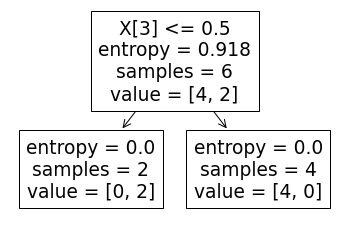

In [14]:
from sklearn import tree
%matplotlib inline

tree.plot_tree(dtc_entropy1)

### Step3. [Create a Test Set]

In [15]:
import csv
fields = ['Name','Toothed', 'Hair', 'Breathes', 'Legs', 'Species']

# data rows of csv file
rows = [ ['Turtile','FALSE','FALSE','TRUE','FALSE','Reptile'],
 ['Blue Whales','FALSE','TRUE','TRUE','TRUE','Mammal'],
 ['Crocodile','TRUE','FALSE','TRUE','TRUE','Reptile'] ]

# name of csv file
filename = "testing.csv"
with open(filename, 'w') as file:
 # creating a csv dict writer object
 writer = csv.writer(file)

 # writing headers (field names)
 writer.writerow(fields)

 # writing data rows
 writer.writerows(rows)

In [16]:
test_set = pd.read_csv('testing.csv')
test_set

,Name,Toothed,Hair,Breathes,Legs,Species
0,Turtile,False,False,True,False,Reptile
1,Blue Whales,False,True,True,True,Mammal
2,Crocodile,True,False,True,True,Reptile


In [17]:
test_set["Label"] = label_encoder.fit_transform(test_set["Species"])
test_set

,Name,Toothed,Hair,Breathes,Legs,Species,Label
0,Turtile,False,False,True,False,Reptile,1
1,Blue Whales,False,True,True,True,Mammal,0
2,Crocodile,True,False,True,True,Reptile,1


### Step4. [Perform prediction]

In [18]:
#Use your ID3 DT model that you created before and predict labels for this test set. Check your predictions. Correct?
stp4 = test_set.drop(['Name','Species','Label'],axis=1)
y_prd = dtc_entropy1.predict(stp4)
y_prd

array([1, 0, 0])

In [19]:
accuracy_score(test_set.Label,y_prd)

0.6666666666666666

### Step5. [Build CART Decision Tree Model]

In [20]:
clf_1 = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=42)
clf_1.fit(X,y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [21]:
clf_1.predict(stp4)

array([1, 0, 1])

In [22]:
with open("tree2.dot", 'w') as f:
        f = tree.export_graphviz(clf_1,out_file=f,max_depth = 4,impurity = False,feature_names = X.columns.values,class_names = ['Reptile','Mammal'],filled=True)

[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

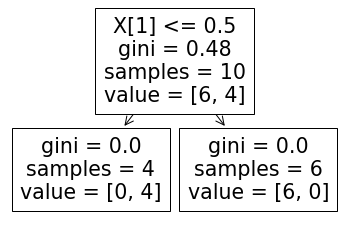

In [23]:
from sklearn import tree
tree.plot_tree(clf_1)

### Step6. [Buid DT with Zoo dataset]

In [24]:
animal_2 = pd.read_csv("zoo.csv")

In [25]:
animal_2 

,name,hair,feathers e,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [26]:
animal_2.head()

,name,hair,feathers e,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [27]:
animal_2.shape

(100, 18)

In [28]:
animal_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        100 non-null    object
 1   hair        100 non-null    int64 
 2   feathers e  100 non-null    int64 
 3   eggs        100 non-null    int64 
 4   milk        100 non-null    int64 
 5   airborne    100 non-null    int64 
 6   aquatic     100 non-null    int64 
 7   predator    100 non-null    int64 
 8   toothed     100 non-null    int64 
 9   backbone    100 non-null    int64 
 10  breathes    100 non-null    int64 
 11  venomous    100 non-null    int64 
 12  fins        100 non-null    int64 
 13  legs        100 non-null    int64 
 14  tail        100 non-null    int64 
 15  domestic    100 non-null    int64 
 16  catsize     100 non-null    int64 
 17  type        100 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.2+ KB


In [29]:
X1 = animal_2.drop(['name','type'],axis=1)
y1 = animal_2.type

In [30]:
X__train,X__test,y__train,y__test = train_test_split(X1,y1,test_size=0.33,random_state=0)

In [31]:
clf_2 = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=52)
clf_2.fit(X__train,y__train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=52)

In [32]:
clf_2.predict(X__test)

array([4, 4, 4, 1, 1, 1, 2, 4, 1, 2, 7, 4, 2, 7, 4, 6, 1, 7, 2, 4, 2, 4,
       1, 2, 1, 1, 1, 7, 4, 4, 4, 4, 4], dtype=int64)

In [33]:
clf_3 = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=42)
clf_3.fit(X__train,y__train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [34]:
y_pred=clf_3.predict(X__test)
y_pred

array([7, 4, 4, 1, 1, 1, 2, 4, 1, 2, 7, 4, 2, 7, 4, 6, 1, 7, 2, 4, 2, 7,
       1, 2, 1, 1, 1, 7, 4, 7, 4, 7, 7], dtype=int64)

In [35]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
ss = scale.fit_transform(X__train)
ss1 = scale.transform(X__test)
print("model accuracy :",accuracy_score(y__test,y_pred))
print("Train accuracy :",clf_3.score(ss,y__train))
print("Test accuracy :",clf_3.score(ss1,y__test))

model accuracy : 0.8181818181818182
Train accuracy : 0.9253731343283582
Test accuracy : 0.8181818181818182


In [36]:
animal_2.type.value_counts(dropna=False)

1    41
2    19
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [37]:
print(classification_report(y__test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         4
           4       1.00      1.00      1.00         8
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2
           7       0.33      1.00      0.50         3

    accuracy                           0.82        33
   macro avg       0.62      0.64      0.60        33
weighted avg       0.79      0.82      0.78        33



[Text(239.14285714285714, 195.696, 'X[3] <= 0.5\ngini = 0.708\nsamples = 67\nvalue = [32, 13, 1, 5, 3, 6, 7]'),
 Text(191.31428571428572, 152.208, 'X[1] <= 0.5\ngini = 0.764\nsamples = 35\nvalue = [0, 13, 1, 5, 3, 6, 7]'),
 Text(143.4857142857143, 108.72, 'X[11] <= 0.5\ngini = 0.752\nsamples = 22\nvalue = [0, 0, 1, 5, 3, 6, 7]'),
 Text(95.65714285714286, 65.232, 'X[4] <= 0.5\ngini = 0.671\nsamples = 17\nvalue = [0, 0, 1, 0, 3, 6, 7]'),
 Text(47.82857142857143, 21.744, 'gini = 0.583\nsamples = 12\nvalue = [0, 0, 1, 0, 3, 1, 7]'),
 Text(143.4857142857143, 21.744, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 5, 0]'),
 Text(191.31428571428572, 65.232, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0, 0, 0]'),
 Text(239.14285714285714, 108.72, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0, 0, 0]'),
 Text(286.9714285714286, 152.208, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0, 0, 0, 0, 0]')]

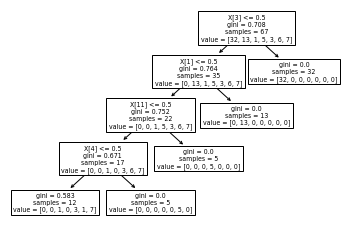

In [38]:
from sklearn import tree
tree.plot_tree(clf_3)